## Observations and Insights 

In [1]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pprint import pprint

In [2]:
# Set the file paths
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# View mouse data
mouse_metadata.style.hide_index()

In [3]:
# View study results
study_results.style.hide_index()

In [4]:
# Combine the data into a single dataframe and view
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_df.style.hide_index()

In [5]:
# Delete unneeded column
del merged_df['Age_months']
del merged_df["Metastatic Sites"]

# Display the resulting data frame
merged_df.style.hide_index()

In [6]:
# Checking the number of mice.
number_of_mice = merged_df['Mouse ID'].nunique()
number_of_mice

249

In [7]:
# Determine the Mouse ID that shows up with duplicate Mouse ID and Timepoint entries. 
duplicate_mouse = merged_df.loc[merged_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = merged_df.loc[merged_df["Mouse ID"] == duplicate_mouse[0]]
duplicate_mouse_df

Mouse ID Drug Regimen     Sex  Weight (g)  Timepoint  Tumor Volume (mm3)
908     g989     Propriva  Female          26          0           45.000000
909     g989     Propriva  Female          26          0           45.000000
910     g989     Propriva  Female          26          5           48.786801
911     g989     Propriva  Female          26          5           47.570392
912     g989     Propriva  Female          26         10           51.745156
913     g989     Propriva  Female          26         10           49.880528
914     g989     Propriva  Female          26         15           51.325852
915     g989     Propriva  Female          26         15           53.442020
916     g989     Propriva  Female          26         20           55.326122
917     g989     Propriva  Female          26         20           54.657650
918     g989     Propriva  Female          26         25           56.045564
919     g989     Propriva  Female          26         30           59.082294
920     g989     Propriva  Female          26         35           62.570880

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df = merged_df[merged_df["Mouse ID"] != duplicate_mouse[0]]
merged_df.style.hide_index()

In [10]:
# Checking the number of mice in the clean DataFrame.
new_number_of_mice = merged_df['Mouse ID'].nunique()
new_number_of_mice

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_regimen = merged_df.groupby("Drug Regimen")
mean_tumor_vol = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_vol = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_vol_variance = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_vol_std_dev = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_vol_sem = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Caluculate number of mice per drug regimen

num_of_mice_per_regimen = merged_df.groupby("Drug Regimen")["Mouse ID"].nunique()


In [12]:
# View mean tumor volume

mean_tumor_vol 

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# View median tumor volume

median_tumor_vol 

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# View tumor volume variance

tumor_vol_variance 

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# View tumor volume standard deviation

tumor_vol_std_dev 

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# View tumor volume SEM (standard error of measurement)
tumor_vol_sem


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_tumor_data = {"Mean Tumor Vol": mean_tumor_vol,
        "Median Tumor Vol": median_tumor_vol,
        "Tumor Vol Variance": tumor_vol_variance,
        "Tumor Vol Std Dev": tumor_vol_std_dev,
        "Tumor Vol SEM": tumor_vol_sem
}

regimen_tumor_vol_df = pd.DataFrame(regimen_tumor_data)

# View summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_tumor_vol_df


Mean Tumor Vol  Median Tumor Vol  Tumor Vol Variance  \
Drug Regimen                                                         
Capomulin          40.675741         41.557809           24.947764   
Ceftamin           52.591172         51.776157           39.290177   
Infubinol          52.884795         51.820584           43.128684   
Ketapril           55.235638         53.698743           68.553577   
Naftisol           54.331565         52.509285           66.173479   
Placebo            54.033581         52.288934           61.168083   
Propriva           52.320930         50.446266           43.852013   
Ramicane           40.216745         40.673236           23.486704   
Stelasyn           54.233149         52.431737           59.450562   
Zoniferol          53.236507         51.818479           48.533355   

              Tumor Vol Std Dev  Tumor Vol SEM  
Drug Regimen                                    
Capomulin              4.994774       0.329346  
Ceftamin               6.268188       0.469821  
Infubinol              6.567243       0.492236  
Ketapril               8.279709       0.603860  
Naftisol               8.134708       0.596466  
Placebo                7.821003       0.581331  
Propriva               6.622085       0.544332  
Ramicane               4.846308       0.320955  
Stelasyn               7.710419       0.573111  
Zoniferol              6.966589       0.516398

## Bar and Pie Charts

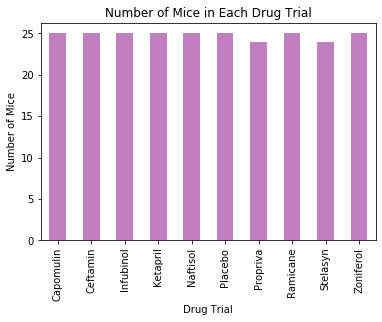

<Figure size 432x288 with 0 Axes>

In [18]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
num_of_mice_per_regimen.plot(kind="bar", color="purple", alpha=0.5, align="center", title="Number of Mice in Each Drug Trial")

# Prints title and labels

plt.xlabel("Drug Trial")
plt.ylabel("Number of Mice")
plt.show()
plt.tight_layout()


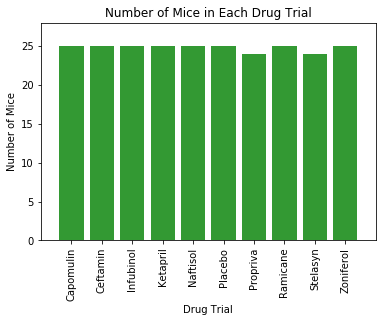

<Figure size 432x288 with 0 Axes>

In [19]:
# Generate a bar chart showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Plots the bar chart
x_axis = np.arange(len(num_of_mice_per_regimen))
plt.bar(x_axis, num_of_mice_per_regimen, color="green", alpha=0.8, align="center")
tick_locations = [value for value in x_axis]

# Sets the x tickmarks
plt.xticks(tick_locations, regimen_tumor_vol_df.index, rotation="vertical")

# Sets the x limits
plt.xlim(-1, len(x_axis))

# Sets the y limits
plt.ylim(0, max(num_of_mice_per_regimen)+3)

# Prints title and labels
plt.title("Number of Mice in Each Drug Trial")
plt.xlabel("Drug Trial")
plt.ylabel("Number of Mice")
plt.show()
plt.tight_layout()


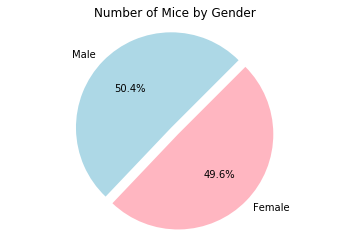

<Figure size 432x288 with 0 Axes>

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = merged_df.loc[merged_df.duplicated(subset=["Mouse ID","Sex"]),"Sex"].unique()
num_of_mice_by_sex = merged_df.groupby("Sex")["Mouse ID"].nunique()


mice_by_gender = pd.Series(num_of_mice_by_sex, index=gender)
mice_by_gender.plot(kind="pie", explode=(0.1,0), labels=mice_by_gender.index, startangle=45, autopct='%1.1f%%', colors=["lightblue","lightpink"], title="Number of Mice by Gender")

plt.axis("equal")
plt.ylabel("")
plt.show()
plt.tight_layout()

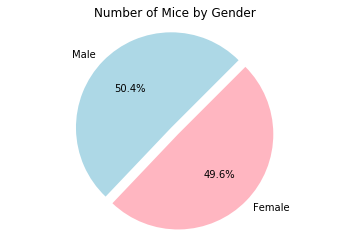

<function matplotlib.pyplot.legend(*args, **kwargs)>

<Figure size 432x288 with 0 Axes>

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels= mice_by_gender.index
plt.pie(mice_by_gender, labels=labels, explode=(0.1,0), autopct='%1.1f%%', colors=["lightblue","lightpink"], startangle=45)
plt.axis("equal")
plt.title("Number of Mice by Gender")
plt.show()
plt.tight_layout()
plt.legend

## Quartiles, Outliers and Boxplots

In [22]:
# Put treatments into a list for use in later for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin

drugs_to_analyze = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:

# Sort rows in descending order by Mouse ID and Timepoint
sorted_by_mouse_timepoint_df = merged_df.sort_values(["Mouse ID", "Timepoint"], axis=0, ascending=False, inplace=False) 

# Save the first entry (last Timepoint) for each of the 248 mice
final_volume_df = sorted_by_mouse_timepoint_df.groupby('Mouse ID').first()  

# Final tumor volume for each of the 248 mice
final_volume_df


Drug Regimen     Sex  Weight (g)  Timepoint  Tumor Volume (mm3)
Mouse ID                                                                
a203        Infubinol  Female          23         45           67.973419
a251        Infubinol  Female          25         45           65.525743
a262          Placebo  Female          29         45           70.717621
a275         Ceftamin  Female          28         45           62.999356
a366         Stelasyn  Female          29         30           63.440686
...               ...     ...         ...        ...                 ...
z435         Propriva  Female          26         10           48.710661
z578         Ramicane    Male          16         45           30.638696
z581        Infubinol  Female          25         45           62.754451
z795         Naftisol  Female          29         45           65.741070
z969         Naftisol    Male          30         45           73.867845

[248 rows x 5 columns]

In [24]:
# Filter to ONLY final tumor volume for mice in one of the 4 drugs we are analyzing
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_volume_df = final_volume_df.loc[final_volume_df['Drug Regimen'].isin(drugs_to_analyze)]

final_volume_df


Drug Regimen     Sex  Weight (g)  Timepoint  Tumor Volume (mm3)
Mouse ID                                                                
a203        Infubinol  Female          23         45           67.973419
a251        Infubinol  Female          25         45           65.525743
a275         Ceftamin  Female          28         45           62.999356
a411         Ramicane    Male          22         45           38.407618
a444         Ramicane  Female          25         45           43.047543
...               ...     ...         ...        ...                 ...
y769         Ceftamin  Female          27         45           68.594745
y793        Capomulin    Male          17         45           31.896238
y865         Ceftamin    Male          26         45           64.729837
z578         Ramicane    Male          16         45           30.638696
z581        Infubinol  Female          25         45           62.754451

[100 rows x 5 columns]

In [30]:
# Create empty list to fill with tumor vol data (for plotting)

for rows in final_volume_df:
    volumes = final_volume_df["Tumor Volume (mm3)"]

#list(volumes).sort(['1'], ascending=True)
print(volumes)

Mouse ID
a203    67.973419
a251    65.525743
a275    62.999356
a411    38.407618
a444    43.047543
          ...    
y769    68.594745
y793    31.896238
y865    64.729837
z578    30.638696
z581    62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64


In [39]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Calculate quartiles for box and whisker plot
quartiles = volumes.quantile([.25, .50, .75])

lowerq = quartiles[0.25]
higherq = quartiles[0.75]
iqr = higherq - lowerq

lower_bound = lowerq - (1.5 * iqr)
upper_bound = higherq + (1.5 * iqr)

# View Quartiles and Lower and Upper Bounds to determine outliers
print(f"Quartiles =")
print(f"{quartiles}")
print(f"Lower Bound = {lower_bound}")
print(f"Upper Bound = {upper_bound}")

Quartiles =
0.25    37.187744
0.50    45.000000
0.75    59.930262
Name: Tumor Volume (mm3), dtype: float64
Lower Bound = 3.0739668737499812
Upper Bound = 94.04403868375002


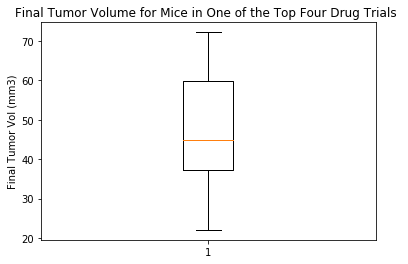

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Mice in One of the Top Four Drug Trials ')
ax1.set_ylabel('Final Tumor Vol (mm3)')
ax1.boxplot(volumes)
plt.show()


    
# Locate the rows which contain mice on each drug and get the tumor volumes
    
    
# add subset 
    

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
